In [1]:
import pandas as pd
import time
import numpy as np

In [2]:
sales_data = pd.read_csv('/Users/guybasson/Desktop/sdatta-nlp/palmers_fashion/f_sales_v_fashion.csv')
sales_data['date'] = pd.to_datetime(sales_data['date'])
sales_data['item'] = sales_data['sku'].astype(str)
sales_data['store'] = sales_data['store'].astype(str)
sales_data = sales_data.rename(columns={'total_sales':'sales'})
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4990977 entries, 0 to 4990976
Data columns (total 7 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   sku                      int64         
 1   store                    object        
 2   date                     datetime64[ns]
 3   average_price            float64       
 4   average_dicounted_price  float64       
 5   sales                    float64       
 6   item                     object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 266.5+ MB


In [3]:
warehouse_data = pd.read_csv('/Users/guybasson/Desktop/sdatta-nlp/palmers_fashion/warehouse_stock_fashion.csv')
warehouse_data['valid_to_date'] = warehouse_data['valid_to_date'].replace('2099-12-31', sales_data['date'].max().strftime('%Y-%m-%d'))

In [4]:
warehouse_data['valid_to_date'].max()

'2023-12-12'

In [5]:
mbew_fashion = pd.read_csv('mbew_fashion.csv')
mbew_fashion['valid_to_date'] = mbew_fashion['valid_to_date'].replace('2099-12-31', sales_data['date'].max().strftime('%Y-%m-%d'))
mbew_fashion['valid_to_date'] = pd.to_datetime(mbew_fashion['valid_to_date'])
mbew_fashion['valid_from_date'] = pd.to_datetime(mbew_fashion['valid_from_date'])
mbew_fashion['item'] = mbew_fashion['sku'].astype(str).str[:12]
mbew_fashion

,store,sku,valid_from_date,valid_to_date,stock,item
0,123,100549055000004,2017-04-21,2023-12-12,0.0,100549055000
1,89,100532175000001,2017-04-21,2023-12-12,0.0,100532175000
2,43,100553018000001,2017-04-21,2023-12-12,0.0,100553018000
3,104,100548169000007,2017-04-21,2023-12-12,0.0,100548169000
4,85,100549049000003,2017-04-21,2023-12-12,0.0,100549049000
...,...,...,...,...,...,...
17812117,18,100552850000002,2020-05-07,2023-12-12,0.0,100552850000
17812118,99,100653096000013,2020-05-07,2020-08-14,1.0,100653096000
17812119,46,100557049000004,2018-11-17,2023-12-12,0.0,100557049000
17812120,8,100511203000004,2017-04-21,2023-12-12,0.0,100511203000


In [6]:
mbew_fashion_no_zero = mbew_fashion[mbew_fashion['stock'] > 0]
mbew_fashion_no_zero['valid_from_date'] = pd.to_datetime(mbew_fashion_no_zero['valid_from_date'])
dict_of_first_month_date_for_sku = {}
i= 0
for sku in mbew_fashion_no_zero['sku'].unique():
    i+=1
    print(str(i) + ' out of ' + str(len(mbew_fashion_no_zero['sku'].unique())))
    data_ = mbew_fashion_no_zero[mbew_fashion_no_zero['sku'] == sku]
    first_date = data_['valid_from_date'].min()
    # put the month in the dict from the first date
    dict_of_first_month_date_for_sku[sku] =  first_date.strftime('%m/%y')

                     sku store       date  average_price  \
0        100009119000002    76 2019-08-05          49.90   
1        100009134000001  4134 2018-02-27          49.99   
2        100009134000003  4904 2018-02-03          49.99   
3        100009134000004  4904 2018-01-11          49.99   
4        100009134000004  4904 2018-02-08          49.99   
...                  ...   ...        ...            ...   
4990972  201999999991001    95 2018-08-30           2.99   
4990973  201999999991001    95 2018-08-31           2.99   
4990974  201999999991001    95 2018-12-03           2.99   
4990975  201999999991001    96 2018-12-08           2.99   
4990976  201999999991001    99 2021-07-20           2.99   

         average_dicounted_price  sales             item  
0                           5.00    1.0  100009119000002  
1                          24.99    1.0  100009134000001  
2                          24.99    1.0  100009134000003  
3                          24.99    1.0  10

In [7]:
# take MM/YY from first date
first_date.strftime('%m/%y')


In [0]:
dict_of_first_day_for_sku

In [9]:
print(sales_data)

In [13]:
strong_sku = sales_data.groupby(['sku'])['sales'].sum().sort_values(ascending=False).reset_index()

      store              sku valid_from_date valid_to_date  stock
60441  VZ01  100642246000001      2023-02-02    2023-03-22    0.0
64592  VZ01  100642246000001      2023-03-23    2023-04-05  439.0
65653  VZ01  100642246000001      2023-04-06    2023-04-06  356.0
65741  VZ01  100642246000001      2023-04-07    2023-04-07  251.0
65850  VZ01  100642246000001      2023-04-08    2023-04-11  238.0
65962  VZ01  100642246000001      2023-04-12    2023-04-12  224.0
66086  VZ01  100642246000001      2023-04-13    2023-04-13  221.0
66182  VZ01  100642246000001      2023-04-14    2023-04-14  212.0
66293  VZ01  100642246000001      2023-04-15    2023-04-17  210.0
66444  VZ01  100642246000001      2023-04-18    2023-04-18  207.0
66502  VZ01  100642246000001      2023-04-19    2023-04-21  204.0
66833  VZ01  100642246000001      2023-04-22    2023-04-24  198.0
67022  VZ01  100642246000001      2023-04-25    2023-04-25  196.0
67134  VZ01  100642246000001      2023-04-26    2023-04-26  188.0
67258  VZ0

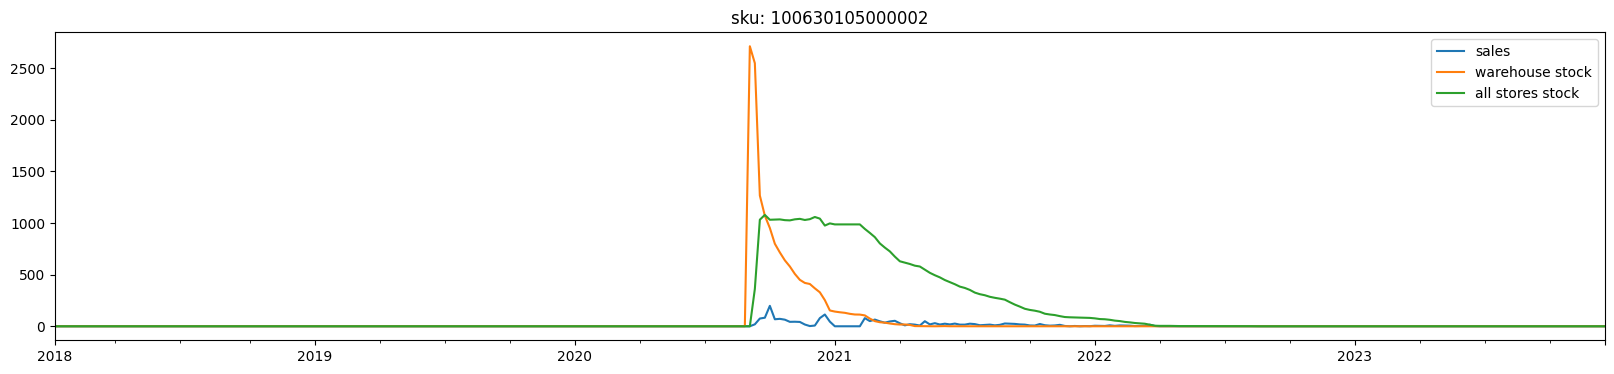

In [15]:
import matplotlib.pyplot as plt
for sku in [100630490000001, 100630490000002, 100630490000003, 100630490000004, 100630490000005, 100630490000006, 100630490000007, 100630490000008, 100630490000009, 100630490000010, 100630490000011, 100630490000012, 100630490000013, 100630490000014, 100630490000015, 100630490000016, 100630490000017, 100630490000018, 100630490000019, 100630490000020, 100630490000021,]:
    sku_data = sales_data[sales_data['sku'] == sku].groupby('date')['sales'].sum()
    sku_data = sku_data.reindex(pd.date_range(start=sales_data['date'].min(),
                                                # today
                                                end=sales_data['date'].max(),

                                                freq='D')).fillna(0)
    sku_warehouse = warehouse_data[warehouse_data['sku'].astype(str) == str(sku)].sort_values(by='valid_from_date')
    sku_warehouse_df_final = pd.DataFrame()
    for row in sku_warehouse.iterrows():
        sku_warehouse_df_final = pd.concat([sku_warehouse_df_final, pd.DataFrame({'date':pd.date_range(start=row[1]['valid_from_date'], end=row[1]['valid_to_date'], freq='D'), 'warehouse stock':row[1]['stock']})])
    sku_warehouse_df_final = sku_warehouse_df_final.set_index('date')
    relevant_sku_stores_stock = mbew_fashion[mbew_fashion['sku'] == sku]
    all_stores_sku_stock_data = {}
    for store in relevant_sku_stores_stock['store'].unique():
        store_sku_data = relevant_sku_stores_stock[relevant_sku_stores_stock['store'] == store]
        one_store_stock_sku_all = pd.DataFrame()
        for row in store_sku_data.iterrows():
            one_store_stock_sku = pd.DataFrame({'date':pd.date_range(start=row[1]['valid_from_date'],
                                                                     end=row[1]['valid_to_date'],
                                                                     freq='D'),
                                                'store stock':row[1]['stock']})
            one_store_stock_sku_all = pd.concat([one_store_stock_sku_all, one_store_stock_sku])
        one_store_stock_sku_all = one_store_stock_sku_all.set_index('date')
        all_stores_sku_stock_data[store] = one_store_stock_sku_all
        # merge all stores with outer join
    all_stores_final_stock_data = pd.DataFrame()
    for store in all_stores_sku_stock_data.keys():
        relevant_store_data_1 = all_stores_sku_stock_data[store]
        relevant_store_data_1 = relevant_store_data_1.rename(columns={'store stock':'store {}'.format(store) + ' stock'})
        all_stores_final_stock_data = pd.concat([all_stores_final_stock_data, relevant_store_data_1], axis=1, join='outer')
    all_store_sum_stock = all_stores_final_stock_data.sum(axis=1).to_frame().rename(columns={0:'all stores stock'})
    # merge by index
    sku_data = pd.merge(sku_data, sku_warehouse_df_final, left_index=True, right_index=True, how='left').fillna(0)
    sku_data = pd.merge(sku_data, all_store_sum_stock, left_index=True, right_index=True, how='left').fillna(0)
    sku_data_w = sku_data.resample('W').agg({'sales':'sum', 'warehouse stock':'mean', 'all stores stock':'mean'})
    sku_data_w.plot(figsize=(20,4))
    plt.title('sku: ' + str(sku))

    plt.show()

In [11]:
sku_warehouse = warehouse_data[warehouse_data['sku'].astype(str) == str(sku)].sort_values(by='valid_from_date')

store: 7



KeyboardInterrupt



In [ ]:
sales_data['sku_store'] = sales_data['sku'].astype(str) + ',' + sales_data['store'].astype(str)
mbew_fashion['sku_store'] = mbew_fashion['sku'].astype(str) + ',' + mbew_fashion['store'].astype(str)

In [ ]:
import numpy as np
import time

start_time = time.time()
mbew_fashion = mbew_fashion.sort_values('valid_from_date')

for store in sales_data['store'].unique():
    print("store:", store)
    len_of_store = sales_data[sales_data['store'] == store]["sku_store"].nunique()

    unique_sku_stores =  sales_data[sales_data['store'] == store]["sku_store"].unique()

    mbew_fashion['valid_from_date'] = pd.to_datetime(mbew_fashion['valid_from_date'])
    mbew_fashion['valid_to_date'] = pd.to_datetime(mbew_fashion['valid_to_date'])
    filtered_mbew_fashion = mbew_fashion[mbew_fashion['sku_store'].isin(unique_sku_stores)]

    # Function to generate date ranges
    def generate_date_ranges(row):
        return pd.date_range(row['valid_from_date'], row['valid_to_date'])

    # Apply function to create date ranges
    df_all_2 = filtered_mbew_fashion.apply(generate_date_ranges, axis=1)

    # Create DataFrame with SKU-store and dates
    df_all_2 = pd.DataFrame({
        'sku_store': np.repeat(filtered_mbew_fashion['sku_store'].values, df_all_2.str.len()),
        'date': np.concatenate(df_all_2.values)  # Convert DatetimeIndex to array for concatenation
    })
    # merge left by ['sku_store', 'date'] and right by ['sku_store', 'valid_to_date']
    df_all_2 = pd.merge(df_all_2, filtered_mbew_fashion[['sku_store','valid_from_date', 'stock']], left_on=['sku_store', 'date'], right_on=['sku_store', 'valid_from_date'], how='left')
    # ffil stock
    df_all_2['stock'] = df_all_2['stock'].ffill()
    df_all_2 = df_all_2.drop(columns=['valid_from_date'])
    df_all_2 = pd.merge(sales_data, df_all_2, on=["sku_store","date"], how="right")
    df_all_2['sku'] = df_all_2['sku_store'].str.split(',').str[0]
    df_all_2['store'] = df_all_2['sku_store'].str.split(',').str[1]
    df_all_2['item'] = df_all_2['sku'].astype(str).str[:12]
    df_all_2['sales'] = df_all_2['sales'].fillna(0)
    df_all_2.to_parquet("df_all_store_{}.parquet".format(store))

print("--- %s seconds ---" % (time.time() - start_time))

# generate warehouse data

In [ ]:
sku_unique_in_sales = sales_data['sku'].unique()

In [ ]:
print(warehouse_data[warehouse_data['sku'].isin([100642246000001])])

In [ ]:

start_time = time.time()
warehouse_data['valid_from_date'] = pd.to_datetime(warehouse_data['valid_from_date'])
warehouse_data['valid_to_date'] = pd.to_datetime(warehouse_data['valid_to_date'])
warehouse_data = warehouse_data.sort_values('valid_from_date')
warehouse_data['sku_store'] = warehouse_data['sku'].astype(str) + ',' + warehouse_data['store'].astype(str)
warehouse_data_sample = warehouse_data[warehouse_data['sku'].isin(sku_unique_in_sales)]
for store in ['VZ01']:
    print("store:", store)

    warehouse_data_sample['valid_from_date'] = pd.to_datetime(warehouse_data_sample['valid_from_date'])
    warehouse_data_sample['valid_to_date'] = pd.to_datetime(warehouse_data_sample['valid_to_date'])
    filtered_warehouse_data = warehouse_data_sample

    # Function to generate date ranges
    def generate_date_ranges(row):
        return pd.date_range(row['valid_from_date'], row['valid_to_date'])

    # Apply function to create date ranges
    df_all_2 = filtered_warehouse_data.apply(generate_date_ranges, axis=1)

    # Create DataFrame with SKU-store and dates
    df_all_2 = pd.DataFrame({
        'sku': np.repeat(filtered_warehouse_data['sku'].values, df_all_2.str.len()),
        'date': np.concatenate(df_all_2.values)  # Convert DatetimeIndex to array for concatenation
    })
    df_all_2 = pd.merge(df_all_2, filtered_warehouse_data[['sku','valid_from_date', 'stock']], left_on=['sku', 'date'], right_on=['sku', 'valid_from_date'], how='left')
    # ffil stock
    df_all_2['stock'] = df_all_2['stock'].ffill()
  #  df_all_2 = df_all_2.rename(columns={'stock':'warehouse stock'})
    df_all_2 = df_all_2.drop(columns=['valid_from_date'])

    df_all_2.to_parquet("df_all_store_{}.parquet".format(store))

print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
df_all_2.to_parquet("df_all_store_{}.parquet".format(store))

In [ ]:
df_all_2['sku_store'].unique()

In [ ]:
df_all_2

In [ ]:
warehouse_data_sample[warehouse_data_sample['sku'] == '100657013000006']

In [ ]:
unique_sku_stores

In [ ]:
df_all_2

In [ ]:
df_all_2

In [ ]:
mbew_fashion[mbew_fashion['sku_store'] == '100090812000001,100']

In [ ]:
df_all_2[df_all_2['sku_store'] == '100090812000001,100']

In [ ]:
warehouse_data.info()

In [ ]:
sku_warehouse_df_final

In [ ]:
print(100630490000005)

In [ ]:
sku_data